In [41]:
"""Computation of Betti numbers and Euler characteristic in a network"""

"""
__author__ = "Giulia Moreni"
__contact__ = "giulia.moreni1995@gmail.com"
__date__ = "2020/05/15"   ### 
__status__ = "Concluded" ### 

####################
Review History   #
####################

Reviewed by Name Date ### 

"""

'\n__author__ = "Giulia Moreni"\n__contact__ = "giulia.moreni1995@gmail.com"\n__date__ = "2020/05/15"   ### \n__status__ = "Concluded" ### \n\n####################\nReview History   #\n####################\n\nReviewed by Name Date ### \n\n'

In [42]:
####################
# Libraries        #
####################
import itertools
import numpy as np
import networkx as nx
from scipy.sparse import lil_matrix
import matplotlib as plt
import time
import glob
import scipy as sio 

In [45]:
#Function to compute the Euler Caracteristic
def euler(G, verbose = True):
    """#Function to compute the Euler characteristic of a network 

    Parameters
    ----------
    Argument1: G is a network. It is in the shape of a network graph of the library networkx G.graph()
    
    Returns
    -------
    out: value of the Euler characteristic of that network

   """
    def DIAGNOSTIC(*params): # If verbose is True it will print all the DIAGNOSTIC
        if verbose: 
            print(*params)

    DIAGNOSTIC("Nodes in G: ", G.nodes())    
    DIAGNOSTIC("Edges in G: ", G.edges())
    DIAGNOSTIC("Number of nodes: {}, edges: {}".format(G.number_of_nodes(), G.number_of_edges()))
    
    # 1. Prepare maximal cliques
    
    C = nx.find_cliques(G) # C now is the operator "find clique" (to do the list I should do list(nx.find_cliques(G)) )
        
    #Create list C with all the cliques
    #Sort each clique, convert it from list to tuple
    C = [tuple(sorted(c)) for c in C]
    DIAGNOSTIC("List with all maximal simplex C:",C)
    
    DIAGNOSTIC("Number of maximal cliques: %i"%(len(C)))
    

   
    # 2. Enumerate all simplices
    
    S = [] #List of dictionaries
    # S[k] is the dictionary which contain all k-simplices
    #S[k].keys() are simplex s (s is one of the k-simplex of the dictionary S[k])
    # S[k].values() are the ID of simplex s
    DIAGNOSTIC("I start the loop where I create for each k the Sk list with all the k-simplex")
    n=max(len(c) for c in C)
    for k in range(0, n) :
        
        # Get all (k+1)-cliques, i.e. k-simplices, from max cliques mc
        
        Sk = sorted(set(c for mc in C for c in itertools.combinations(mc, k+1)))#Sk=[] 
                                                                        #for mc in C:
                                                                            #for c in itertools.combinations(mc, k+1):
                                                                                #Sk.append(c)
       
        DIAGNOSTIC("list of %i-simplex S%i:"%(k,k), Sk)
        # Check that each simplex is in increasing order
        assert(all((list(s) == sorted(s)) for s in Sk))
        # Assign an ID to each simplex, in lexicographic order
        S.append(dict(zip(Sk, range(0, len(Sk))))) # zip(Sk,range()) is an object (composed by tuples) where each element of Sk is associated to a number.
                                                    # I then from the zip object create the dictionary where the key is the Sk element and the value the number
                                                    #I put this dictionary in the S list (list of dictionary) 
        
    for (k, Sk) in enumerate(S):
        DIAGNOSTIC("Number of {}-simplices: {}".format(k, len(Sk)))
    
    DIAGNOSTIC("S dictionary",S)  
    
    # The cliques are redundant now
    del C

    # Euler characteristic
    ec = sum(((-1)**k * len(S[k])) for k in range(0, len(S))) #Alternate sum of all the quantity of simplex of different dimension we have
                                                              #len(S[k]) is how many k-simplex we have
                                                              # I sum for every k we have, len(S) is the maximum k we can find (dimension of the simplex)
    DIAGNOSTIC("Euler characteristic:", ec)
    return ec

In [52]:
def euler_k(G,kmax): #THIS ONE HAS THE K_MAX!!!!!
    """#Function to compute the Euler characteristic of a network with the restraints that we look for cliques up to dimension k

    Parameters
    ----------
    Argument1: G is a network. It is in the shape of a network graph of the library networkx G.graph()
    Argument2: maximum dimension of clique I consider
    
    Returns
    -------
    out: "S"=EC, tau, kmax, clique_0,Clique_1,Clique_2, Clique_3, and so on... is a list!
            S[0]= value of the Euler characteristic of that network

   """   
    # 1. Prepare maximal cliques
    
    
    #main()
    Nodes=len(G)
    
    Cliques = nx.find_cliques(G)
    
    def max_cliques(N,k):
        mclq=0
        for i in range(0,k):
            mclq+=sio.special.binom(N,k)

        return int(mclq)
    
    Limit=max_cliques(Nodes,kmax)+100 #maximum number of cliques that you want to find 
    print("Limit:",Limit)
    Cl=[]
    while True:
        try:
            for i in range(0,Limit):
                clq=next(Cliques)
                if len(clq)<=kmax: # IF YOU DON'T WANNA USE KMAX JUST COMMENT THIS STEP TO MAKE IT QUICKER
                    Cl.append(clq)
        except StopIteration:
            break
    
    
    # Sort each clique, make sure it's a tuple
    C = [tuple(sorted(c)) for c in Cl]
    print("C:",Cl)
    
    S= [] #Contain the number of clique of each order k  
    for k in range(0, max(len(s) for s in C)) :
        # Get all (k+1)-cliques, i.e. k-simplices, from max cliques mc
        Sk = set(c for mc in C for c in itertools.combinations(mc, k+1))
        S.append(len(Sk))
    #print("S:",S)
    tau=sum(S) # Tau gives the total number of cliques
    print(tau)
    kmax=len(S) # Kmax is the maximum clique size one can find
    print(kmax)
    ec=0 # ec is the Euler characteristics
    for i in range(0,len(S)):
        if i%2==0:
                ec+=S[i]
        if i%2==1:
                ec+=-S[i]
                
    EC = sum(((-1)**i * S[i]) for i in range(0, len(S)))
    print("EC:",EC)    
    print("ec:",ec)    

    #print((k))
    print("insert the things")
    S.insert(0,kmax)
    S.insert(0,tau)
    S.insert(0,ec)
    print("S:Euler,total cliques, maximum dimension of clique, number of clique_0,Clique_1,Clique_2, Clique_3")
    print("S:",S)
    for i in range(kmax,30): # I want to include new elements after kmax with zero, to say that there are no simplicies with this size
        S.insert(kmax+3,0) # The first value is Euler, the second is tau, the third is kmax
    # The output will be EC, tau, kmax, clique_0,Clique_1,Clique_2, Clique_3, and so on...
    return S

In [ ]:
######################
#EXAMPLE OF APPLICATION OF THE TWO EULER FUNCTIONS
######################
G = nx.Graph()
G.add_edges_from([ (1, 4), (1, 2), (2, 3), (3, 4),(5,4),(5,3),(5,2),(5,1)])
G.add_edges_from([(6, 4), (6, 3), (6, 2), (6, 1)])
nx.draw(G,with_labels = True)

E=euler(G)
print("Euler value using Euler function:",E)
print("#################### second method ########################" )
S=euler_k(G,4)
print("Euler value (using k limitation):", S[0])

In [13]:
#Function to compute the required betti number
#To call the function insert the Network G and the required betti K_input
#B_0 is the number of connected components
#B_1 is the number of holes
#B_2 is the number of holes 2 tetraedrs one under the other
#B_3 is the complex structure (see image)
def Betti_k(G,K_input,verbose=True):
    """#Function to compute the desired Betti number of a network 

    Parameters
    ----------
    Argument1: G is a network. It is in the shape of a network graph of the library networkx G.graph()
    Argument2: K_input--> insert 1 if you want to compute Betti-1, 2 for Betti-2 etc.
    
    Returns
    -------
    out: value of the desired Betti number.

    """
    def DIAGNOSTIC(*params): # If verbose is True it will print all the DIAGNOSTIC
        if verbose: 
            print(*params)

    DIAGNOSTIC("Nodes in G: ", G.nodes())    
    DIAGNOSTIC("Edges in G: ", G.edges())
    print("Number of nodes: {}, edges: {}".format(G.number_of_nodes(), G.number_of_edges()))
    
    # 1. Prepare maximal cliques
    
    # compute maximal cliques
     
    C = nx.find_cliques(G) # C now is the operator "find clique" (to do the list I should do list(nx.find_cliques(G)) )
    
    #Create list C with all the cliques
    #Sort each clique, convert it from list to tuple
    C = [tuple(sorted(c)) for c in C]
    DIAGNOSTIC("List with all maximal simplex C:",C)    
    DIAGNOSTIC("Number of maximal cliques: %i"%(len(C)))    
   
    # 2. Enumerate all simplices
    
    S = [] #List of dictionaries
    # S[k] is the dictionary which contain all k-simplices
    #S[k].keys() are simplex s (s is one of the k-simplex of the dictionary S[k])
    # S[k].values() are the ID of simplex s
    print("I start the loop where I create the required Sk to then compute betti. Sk is a list with the k-simplex")
    #I set the range for the following loop
    if K_input==0:
        ini=0
        fin=2
    else:
        ini=K_input-1
        fin=K_input+2
        
    for k in range(ini,fin) : # k has 2 values for betti_0 and 3 values for betti1_2_3 
        
        Sk = sorted(set(c for mc in C for c in itertools.combinations(mc, k+1)))#Sk=[] 
                                                                        #for mc in C:
                                                                            #for c in itertools.combinations(mc, k+1):
                                                                                #Sk.append(c)
       
        DIAGNOSTIC("list of %i-simplex S%i:"%(k,k), Sk)        
        # Check that each simplex is in increasing order
        assert(all((list(s) == sorted(s)) for s in Sk))        
        # Assign an ID to each simplex, in order
        S.append(dict(zip(Sk, range(0, len(Sk))))) # zip(Sk,range()) is an object (composed by tuples) where each element of Sk is associated to a number.
                                                    # I then from the zip object create the dictionary where the key is the Sk element and the value the number
                                                    #I put this dictionary in the S list (list of dictionary)   
        print("Number of %i-simplices: "%(k),len(Sk))    
    DIAGNOSTIC("S dictionary",S)      
    #The cliques are redundant now
    del C
    
    # 3. Construct the boundary operator
    
    #Boundary Matrix 
    D =[None, None] #List with the two different k-boundary operators
    
    if K_input==0:
        # D[0] is the zero matrix
        D[0]=(np.zeros((1, G.number_of_nodes())))#I create a matrix of size (1,#nodes)
        
    for k in range(1, len(S)):
        
        #I set the index of D[] and the number of nodes in each group for the combinatory part
        if K_input==0:
            index=k
            b=k
        else:
            index=k-1
            b=k+(K_input-1)
            
        D[index] = np.zeros( (len(S[k-1]), len(S[k])) ) #I create a matrix of size (len(S[k-1]), len(S[k])

        for (ks, j) in S[k].items() :
            
            a=sorted(itertools.combinations(ks, b))
            DIAGNOSTIC("a",a)
            # Indices of all (k-1)-subsimplices s of the k-simplex ks
            I = [S[k-1][s] for s in sorted(itertools.combinations(ks, b))] #S is a list of dictionary with k different size with the di
            DIAGNOSTIC("I",I)

            for i in range(0,len(I)):
                D[index][I[i]][j] = (-1)**(i)

        if D[index].shape[1]==0:
            DIAGNOSTIC("I can't create matrix D_ because I don't have the needed k-simplex")

        DIAGNOSTIC("D",D[index])
            
    print("D_{} has shape {}".format(K_input, D[0].shape))
    print("D_{} has shape {}".format(K_input+1, D[1].shape))
    # The simplices are redundant now
    del S
    
    # 4. Compute rank and dimker of the boundary operators
    
    # dim(Im)=Rank and dim(ker)=V-rank
    rank = [0 if d.shape[1]==0 else np.linalg.matrix_rank(d) for d in D] #dim(Im)
    ker = [(d.shape[1] - rank[n]) for (n, d) in enumerate(D)] #V - rank = dim(ker) ,rank=dim(Im)
    
    #The boundary operators are redundant now
    del D
    DIAGNOSTIC("ker:", ker)
    DIAGNOSTIC("rank:", rank)
    
    # 5. Compute the Betti number   
    
    # Betti number
    B=ker[0]-rank[1]
    print("End of computation\nBetti %i is:"%K_input,B)
    return B
    

Number of nodes: 6, edges: 12
I start the loop where I create the required Sk to then compute betti. Sk is a list with the k-simplex
Number of 0-simplices:  6
Number of 1-simplices:  12
Number of 2-simplices:  8
D_1 has shape (6, 12)
D_2 has shape (12, 8)
End of computation
Betti 1 is: 0


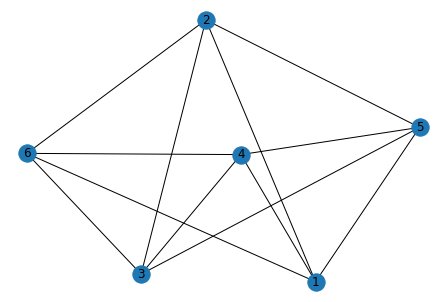

In [55]:
##############
# CALLING THE BETTI FUNCTION
#############
G = nx.Graph()
G.add_edges_from([ (1, 4), (1, 2), (2, 3), (3, 4),(5,4),(5,3),(5,2),(5,1)])
G.add_edges_from([(6, 4), (6, 3), (6, 2), (6, 1)])
nx.draw(G,with_labels = True)

k_in=1
B=Betti_k(G,k_in,verbose=False)

Nodes in G:  [1, 4, 2, 3, 5, 6, 7, 8, 9]
Edges in G:  [(1, 4), (1, 2), (1, 5), (4, 3), (4, 5), (2, 3), (2, 5), (3, 5), (6, 7), (7, 8), (7, 9), (8, 9)]
Number of nodes: 9, edges: 12
List with all maximal simplex C: [(1, 2, 5), (1, 4, 5), (2, 3, 5), (3, 4, 5), (6, 7), (7, 8, 9)]
Number of maximal cliques: 6
I start the loop where I create the required Sk to then compute betti. Sk is a list with the k-simplex
list of 0-simplex S0: [(1,), (2,), (3,), (4,), (5,), (6,), (7,), (8,), (9,)]
Number of 0-simplices:  9
list of 1-simplex S1: [(1, 2), (1, 4), (1, 5), (2, 3), (2, 5), (3, 4), (3, 5), (4, 5), (6, 7), (7, 8), (7, 9), (8, 9)]
Number of 1-simplices:  12
S dictionary [{(1,): 0, (2,): 1, (3,): 2, (4,): 3, (5,): 4, (6,): 5, (7,): 6, (8,): 7, (9,): 8}, {(1, 2): 0, (1, 4): 1, (1, 5): 2, (2, 3): 3, (2, 5): 4, (3, 4): 5, (3, 5): 6, (4, 5): 7, (6, 7): 8, (7, 8): 9, (7, 9): 10, (8, 9): 11}]
a [(1,), (2,)]
I [0, 1]
a [(1,), (4,)]
I [0, 3]
a [(1,), (5,)]
I [0, 4]
a [(2,), (3,)]
I [1, 2]
a [(2,), (5,

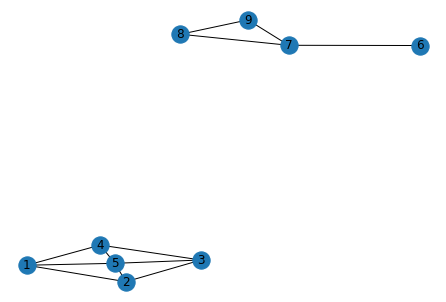

In [33]:
# Here some functions where I created some graphs as examples. 
#To call the function you should just insert the desired Betti number you want to compute for that network.
# E.g. Betti_1 = test_1(1) this will give the number of Betti-1 in the graph inside the function test_1

def test0(K_in):
    #Graph with 2 connected components(B_0)
    G = nx.Graph()
    G.add_edges_from([ (1, 4), (1, 2), (2, 3), (3, 4),(5,4),(5,3),(5,2),(5,1)])
    G.add_edges_from([ (6, 7), (7, 8), (8, 9), (7, 9)])
    nx.draw(G,with_labels = True) 
    
    B=Betti_k(G,K_in,verbose=True)
    
def test1(K_in):
    #Graph with 2d holes(B_1=1)
    G = nx.Graph()
    G.add_edges_from([ (1, 2), (1, 3),(8,9),(7,9),(8,7),(1,8)])
    G.add_edges_from([(4, 5), (5, 6), (6, 7), (7, 4),(4,3)])
    G.add_edges_from([(10, 11),(13,11),(13,10)])
    nx.add_star(G,[8,10,11,12,13])
    nx.draw(G,with_labels = True)
    
    B=Betti_k(G,K_in,verbose=True)
    

def test2(K_in):
    #Graph with  1 3d holes(B_2=1)
    G = nx.Graph()
    G.add_edges_from([ (1, 4), (2, 4), (2, 3), (1, 3)])
    G.add_edges_from([(5, 1), (5, 2), (5, 3), (5, 4)])
    G.add_edges_from([(6, 1), (6, 2), (6, 3), (6, 4)])
    G.add_edges_from([(6, 7), (6, 8), (6, 9), (6, 10)])
    nx.draw(G,with_labels = True)
   
    B=Betti_k(G,K_in,verbose=False)
    
def test3(K_in):
    #Graph with 1 hole in 4 dimension (B_3=1)
    G1 = nx.Graph()
    G1.add_edges_from([(0,1),(1,2),(2,3),(3,0),(4,0),(4,1),(4,2),(4,3),(5,0),(5,1),(5,2),(5,3)])
    G1.add_edges_from([(0,11),(1,11),(2,11),(3,11),(4,11),(5,11),(0,12),(1,12),(2,12),(3,12),(4,12),(5,12)])
    nx.draw(G1,with_labels = True)
    
    B=Betti_k(G1,K_in, verbose=False)
    
def test_matrix(K_in):
    #I compute the network from a Cx matrix and then I compute the betti numbers
    A= np.array(np.loadtxt('Cx_matrix_var01/cx_i=002_n=019.txt'))
    A_thresh=np.matrix(1*(np.copy(A)<=1))
    #print(A_thresh)
    G = nx.from_numpy_matrix(np.matrix(A_thresh))
    #nx.draw(G,with_labels = True)
    
    B=Betti_k(G,K_in, verbose=False)
    E=euler(G,verbose=False)
    print(E)


def random_graph(nodes,prob): #Erdős-Rényi random graph where we have prob of creating an edge
    Random_G=nx.binomial_graph(nodes,prob)
    return Random_G

def test_random(K_in):
    G=random_graph(10,0.8)
    nx.draw(G,with_labels = True)
    B=Betti_k(G,K_in, verbose=False)
    
#Here I can test the networks
start_time = time.time()

test0(0)
#test1(1)
#test2(2)
#test3(3)
#test_matrix()
#test_random(3)
print("The program last %s seconds " % (time.time() - start_time))    

In [35]:
####################################
#THERE ARE TWO METHODS TO THRESHOLD A NETWORK when you have the connectivity matrix Cx: 
#METHOD 1. USING DIRECTY A VALUE OF a desired FILTRATION OR 
#METHOD 2. CHOOSE THE DENSITY OF CONNECTION YOU WANT TO CONSIDER. 
#WE WILL ILLUSTRATE BOTH METHODS
#######################################

# METHOD 1 
def filtr_thresh(Set,filtr,i,verbose=False):
    """#Function to create a network based on a given filtration value

    Parameters
    ----------
    Argument1: "Set" contains the connectivity matrices of different individuals. Set is an array conatining all the arrays (one matrix for each individual)
        
    Returns
    -------
    out: G--> the network obained thresholding the matrix for the given value of the threshold
        filtr--> the threshold used to create the network (it returns the input you gave calling the function)

    """    
    def DIAGNOSTIC(*params): # If verbose is True it will print all the DIAGNOSTIC
        if verbose: 
            print(*params)
            
    DIAGNOSTIC("Filtration chosen: %s. I will create a network where I keep just the connections with value smaller than %s "%(str(filtr).zfill(3),str(filtr).zfill(3)))

    C_thresh=np.matrix(1*(np.copy(Set[i])<filtr)) #I create a matrix where 1 if value<thresh otherwise 0
    #DIAGNOSTIC(C_thresh)
    G = nx.from_numpy_matrix(np.matrix(C_thresh)) #I create the network from the matrix 
 
    return G,filtr

In [36]:
##########################
#APPLICATION OF METHOD 1
# Use the function filtr_thresh 
##########################

txt_files_cx = glob.glob('Cx_matrix_var01/cx*_n=000.txt') #opening 10 Cx matrices, 1 for each type of the 10 types of simulated networks (first experiment n=000 for each) 
                                                        #The matrices are in the folder "Cx_matrix". Here you should insert the folder of matrices you want to analyse
print(txt_files_cx) 
Cx_list = [] #Object that will contain all the Cx matrices

for i in range(0,len(txt_files_cx)): #Reading the data in the files and create an object which contains every matrix
    file_i= txt_files_cx[i]
    Cx_list.append(np.array(np.loadtxt(file_i)))   #Add the matrix of a file to the object Cx_list
Cx=np.array(Cx_list) 


############
#CALLING THE FUNCTION JUST FOR THE PATIENT NUMBER 3, USING filtrarion value=0.3
#G1,filtr= dens_thresh(Cx,0.1,3,verbose=False):
#############

# CALLING THE FUNCTION MANY TIMES FOR DIFFERENT PATIENTS AND DIFFERENT VALUES OF FILTRATION
start_time = time.time()
for i in range(0,10): #One file for each Cx(C1,C2..)
    f=open('betti_greater/betti_0_fil_C%i.txt'%(i+1),"w+")#I create one file for each betti_0 (one for each Cx) 
    #f=open('betti_greater/eul_C%i.txt'%(i+1),"w+")
    
    print("Creation of the networks of C_%i"%(i+1))

    #fitration chosen (it is a list)
    filtr00=list(np.arange(0, 0.1, 0.005))
    filtr0=list(np.arange(0.1, 0.2, 0.003))
    filtr1=list(np.arange(0.2, 0.25, 0.01)) # WHEN the filtration is greater we have more connections and the program is slower. 
                                            #We choose to filtration more distanced so the program doen't need too much time
    filtration=filtr00+filtr0+filtr1
    
    for fi in filtration:
        print("Creation of a new network based on the filtration %s chosen"%str(fi).zfill(3))
        G1,filtr=filtr_thresh(Cx,fi,i,verbose=False) #I call the function to create the different networks
        #E=euler1(G1,verbose=False) # compute the Euler characteristic of the obtained network G1
        #f.write('%f %f \n'%(filtr,E)) #write in a file
        k_in=0 #I want betti_0
        B=Betti_k(G1,k_in, verbose=False) #I call the betti function to compute Betti_0 for that matrix
        f.write('%f %f \n'%(filtr,B)) #I write betti and filtration value in a file 

    f.close()    
print("The program last %s seconds " % (time.time() - start_time))

['Cx_matrix_var01\\cx_i=001_n=000.txt', 'Cx_matrix_var01\\cx_i=002_n=000.txt', 'Cx_matrix_var01\\cx_i=003_n=000.txt', 'Cx_matrix_var01\\cx_i=004_n=000.txt', 'Cx_matrix_var01\\cx_i=005_n=000.txt', 'Cx_matrix_var01\\cx_i=006_n=000.txt', 'Cx_matrix_var01\\cx_i=007_n=000.txt', 'Cx_matrix_var01\\cx_i=008_n=000.txt', 'Cx_matrix_var01\\cx_i=009_n=000.txt', 'Cx_matrix_var01\\cx_i=010_n=000.txt']
Creation of the networks of C_1
Creation of a new network based on the filtration 0.0 chosen
Number of nodes: 100, edges: 0
I start the loop where I create the required Sk to then compute betti. Sk is a list with the k-simplex
Number of 0-simplices:  100
Number of 1-simplices:  0
D_0 has shape (1, 100)
D_1 has shape (100, 0)
End of computation
Betti 0 is: 100
Creation of a new network based on the filtration 0.005 chosen
Number of nodes: 100, edges: 102
I start the loop where I create the required Sk to then compute betti. Sk is a list with the k-simplex
Number of 0-simplices:  100
Number of 1-simplice

KeyboardInterrupt: 

In [6]:
##################

#METHOD 2
#CHOOSE THE DENSITY OF CONNECTION YOU WANT TO CONSIDER. e.g 20% stronger connections

##################

def dens_thresh(Set,den,i,verbose=False):#set contains the networks of different individuals Cx_list, d is the density, i is the individual
    """#Function to create a network based on a given density

    Parameters
    ----------
    Argument1: "Set" contains the connectivity matrices of different individuals. Set is an array conatining all the arrays (one matrix for each individual)
    Argument2: "den" value of density you want to consider
    Argument3: "i" index of the matrix you want to analyse (i.e. index of the patient)
    
    Returns
    -------
    out: G--> the network obained thresholding the matrix for the given value of the density
        threshold--> the threshold correspondant to the desired density used to create the network 

    """    
    
    def DIAGNOSTIC(*params): # If verbose is True it will print all the DIAGNOSTIC
        if verbose: 
            print(*params)
            
    DIAGNOSTIC("Density choosen: %s. I will create a network where I keep just %s perc of the connections"%(str(den).zfill(3),str(den*100).zfill(3)))
    
    all_links_list=sorted(list((Set[i]).ravel()),reverse=True) #create a list with all the strenght of connection in decreasing order
    
    DIAGNOSTIC("all_links_list:",all_links_list)
    DIAGNOSTIC("All_link_lists has len:",len(all_links_list))
    
    
    size=len(Set[0]) # HERE I HAVE THE NUMBER OF NODES I HAVE IN THE NETWORK !!
    cutoff=int(np.ceil(den*size*(size-1))) #np.ceil return float type upper which is the closest, I convert in integer
    DIAGNOSTIC("I want a percentage of %s of total links so cutoff d*N(N-1)/2:"%str(den).zfill(3),cutoff)
    
    threshold=all_links_list[-(cutoff+size)] # I look for the value correspondent to the index "cutoff" (I count in the list from the end and I ignore the first 75 values beacuse they are all 0)

    DIAGNOSTIC("The threshold is:",threshold)
    if verbose:
        newlist_links = [link for link in all_links_list if link > threshold] #List of the wanted percentage of total connections
        #print("newlist_links:",newlist_links)
        print("len(newlist_links):",len(newlist_links))

    C_thresh=np.matrix(1*(np.copy(Set[i])<threshold)) #I create a matrix where 1 if value>thresh otherwise 0 # !!!!BE CAREFUL!!!: in my matrix greater value means less connected! If for you is different change this line
    #DIAGNOSTIC(C_thresh)
    G = nx.from_numpy_matrix(np.matrix(C_thresh)) #I create the network from the matrix 
    #print("G Number of nodes: {}, edges: {}".format(G.number_of_nodes(), G.number_of_edges())) 

    return G,threshold

In [54]:
###################

#APPLICATION OF METHOD 2
#CHOOSE THE DENSITY OF CONNECTION YOU WANT TO CONSIDER. e.g 20% stronger connections

#####################

txt_files_cx = glob.glob('Cx_matrix_var01/cx*_n=000.txt') #opening all the Cx of the 10 types (first experiment n=000 for each) which are in the folder "Cx_matrix"
print(txt_files_cx)
Cx_list = [] #Object that will contain all the Cx matrices

for i in range(0,len(txt_files_cx)): #Reading the data in the files and create an object which contains every matrix
    file_i= txt_files_cx[i]
    Cx_list.append(np.array(np.loadtxt(file_i)))   #Add the matrix of a file to the object Cx_list

Cx=np.array(Cx_list) 

##########
#CALLING THE FUNCTION FOR THE PATIENT NUMBER 3, density=0.1
#G1,filtr= dens_thresh(Cx,0.1,3,verbose=False):
#########

# CALLING THE FUNCTION MANY TIMES FOR DIFFERENT PATIENTS AND DIFFERENT VALUES OF DENSITY
start_time = time.time()
for i in range(0,10):
    f=open('betti_greater/betti_0_C%i.txt'%(i+1),"w+")#I create one file for each betti_0 (one for each Cx) 
    
    #I choose the density I want (is a list)
    density00=[0.002,0.003,0.004,0.005,0.006,0.007,0.008]
    density0=list(np.arange(0.01, 0.09, 0.003))
    density1=list(np.arange(0.1, 0.6, 0.05))
    density=density00+density0+density1
    
    for d in density:
        print("Creation of a new network based on the density %s chosen"%str(d).zfill(3))
        G1,filtr=dens_thresh(Cx,d,i,verbose=False) #I call the function to create the different networks
        k_in=0 #I want betti_0
        B=Betti_k(G1,k_in, verbose=False) #I call the betti function to compute Betti_0 for that matrix
        f.write('%f %f \n'%(filtr,B)) #I write betti and filtration value in a file 

    f.close()    
print("The program last %s seconds " % (time.time() - start_time))

In [ ]:
#####################

#ANOTHER APPLICATION OF METHOD 2 
#EXAMPLE OF INCREASING THE DENSITY AND USING THE FUNCTION dens_thresh FOR A GRAPH WITH 25 NODES
#WE CAN COMPUTE THE BETTI NUMBERS AND THE EULER FOR EACH DENSITY

#######################

start_time = time.time()
# f0=open('betti_greater/betti_0_random_den.txt',"w+")#I create one file for each betti_0 (one for each Cx)
f1=open('betti_greater/betti_1_random_den.txt',"w+")#I create one file for each betti_0 (one for each Cx)
# f2=open('betti_greater/betti_2_random_den.txt',"w+")#I create one file for each betti_0 (one for each Cx)
#f3=open('betti_greater/betti_3_random_den.txt',"w+")#I create one file for each betti_0 (one for each Cx)
#f4=open('betti_greater/euler_random_den.txt',"w+")#I create one file for each betti_0 (one for each Cx)

#I choose the density I want to use
density00=[0.002,0.003,0.004,0.005,0.006,0.007,0.008]
density0=list(np.arange(0.01, 0.09, 0.001))
density1=list(np.arange(0.1, 0.9, 0.004))
density=density00+density0+density1


G_full=random_graph(25,1) #GRAPH WITH 25 CONNECTED NODES WE WILL USE for this example
#nx.draw(G1,with_labels = True) # if you want to visualize it
for (u, v) in G_full.edges():
    G_full.edges[u,v]['weight'] = np.random.uniform(0.1,0.8) # I create a weigted graph (as is the case of connectivity matrix)
A = [np.array(nx.to_numpy_matrix(G_full))]
print(A)

for d in density:
    print("Creation of a new network based on the density %s chosen"%str(d).zfill(3))
    G1,filtr=dens_thresh(A,d,0,verbose=False) #I call the function to create the different networks
#     B0=Betti_k(G1,0, verbose=False)
#     f0.write('%f %f \n'%(filtr,B0)) #I write betti and filtration value in a file 
#     B1=Betti_k(G1,1, verbose=False)
    f1.write('%f %f \n'%(filtr,B1)) #I write betti and filtration value in a file 
    B2=Betti_k(G1,2, verbose=False)
#     f2.write('%f %f \n'%(filtr,B2)) #I write betti and filtration value in a file 
#     B3=Betti_k(G1,3, verbose=False)
#     f3.write('%f %f \n'%(filtr,B3)) #I write betti and filtration value in a file 
#     E=euler(G1,verbose=False)
#     e1=np.log(E)
#     f4.write('%f %f \n'%(filtr,E)) #I write betti and filtration value in a file 
    
# f0.close() 
f1.close() 
# f2.close() 
# f3.close() 
#f4.close() 
print("The program last %s seconds " % (time.time() - start_time))

In [7]:
#####################
# EXAMPLE OF COMPUTATIONS OF BETTI NUMBERS AND EULER USING RANDOM NETWORK with increaing probability,
#for each probability for the obtained random network I compute the Betti numbers and Euler
#####################
start_time = time.time()
#RANDOM GRAPH 10 times WITH PROBABILITY 
for i in range(0,10):
#   f0=open('betti_greater/random/betti_0_random_%i.txt'%i,"w+")#I create one file for each betti_0 (one for each Cx)
#   f1=open('betti_greater/random/betti_1_random_%i.txt'%i,"w+")#I create one file for each betti_0 (one for each Cx)
#   f2=open('betti_greater/random/betti_2_random%i.txt'%i,"w+")#I create one file for each betti_0 (one for each Cx)
#   f3=open('betti_greater/random/betti_3_random%i.txt'%i,"w+")#I create one file for each betti_0 (one for each Cx)
    f4=open('betti_greater/random/1euler_random%i.txt'%i,"w+")#I create one file for each betti_0 (one for each Cx)

    #prob=[0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.6,0.7,0.8]
    prob0=list(np.arange(0, 0.1, 0.005))
    prob1=list(np.arange(0.1, 0.6, 0.005))
    prob2=[0.6,0.63,0.65,0.7,0.75,0.8]
    prob=prob0+prob1+prob2

    for p in prob:
        print("Creation of a new network based on the prob %s chosen"%str(p).zfill(3))
        G1=random_graph(25,p)
        #nx.draw(G,with_labels = True)
#         B0=Betti_k(G1,0, verbose=False)
#         f0.write('%f %f \n'%(p,B0)) #I write betti and filtration value in a file 
#         B1=Betti_k(G1,1, verbose=False)
#         f1.write('%f %f \n'%(p,B1)) #I write betti and filtration value in a file 
#         B2=Betti_k(G1,2, verbose=False)
#         f2.write('%f %f \n'%(p,B2)) #I write betti and filtration value in a file 
#         B3=Betti_k(G1,3, verbose=False)
#         f3.write('%f %f \n'%(p,B3)) #I write betti and filtration value in a file 
        E=euler(G1,verbose=False)
        f4.write('%f %f \n'%(p,E)) #I write betti and filtration value in a file 

#     f0.close() 
#     f1.close() 
#     f2.close() 
#     f3.close() 
    f4.close() 
print("The program last %s seconds " % (time.time() - start_time))

Creation of a new network based on the prob 0.0 chosen
Creation of a new network based on the prob 0.005 chosen
Creation of a new network based on the prob 0.01 chosen
Creation of a new network based on the prob 0.015 chosen
Creation of a new network based on the prob 0.02 chosen
Creation of a new network based on the prob 0.025 chosen
Creation of a new network based on the prob 0.03 chosen
Creation of a new network based on the prob 0.035 chosen
Creation of a new network based on the prob 0.04 chosen
Creation of a new network based on the prob 0.045 chosen
Creation of a new network based on the prob 0.05 chosen
Creation of a new network based on the prob 0.055 chosen
Creation of a new network based on the prob 0.06 chosen
Creation of a new network based on the prob 0.065 chosen
Creation of a new network based on the prob 0.07 chosen
Creation of a new network based on the prob 0.075 chosen
Creation of a new network based on the prob 0.08 chosen
Creation of a new network based on the pr